# Chisheng Li

## 1) RSS Feed Parser
Retrieve and parse CNN's RSS feed and outputs the news headline to `NewsFeed.txt`.

In [1]:
# -*-coding: utf-8 -*-
import feedparser
import re
import string

In [2]:
# Create the regular expressions
reg1 = re.compile(r'<br />') #Regex to replace <br /> with \n (see reg1.sub)
reg2 = re.compile(r'(<!--.*?-->|<[^>]*>)') #Regex to clean all html tags (anything with <something>)

#alternative reg2
#reg2 = re.compile(r'<[^<]+?>')
#reg2 = re.compile(r'<[^>]+>')

reg3 = re.compile(r'&nbsp') #Regex to clean all &nbsp 
reg4 = re.compile(r'\'') #Regex to clean all ' chars
#alternative reg4
#reg4 = re.compile(r"'")

In [3]:
# Parses the RSS feed from RSS
def parseFeeds(str):
    d = feedparser.parse(str)
    print "There are", len(d['items']), "items in", str
    FILE_INPUT = open("NewsFeed.txt","w")
    for item in d['items']:
        first_filter = reg1.sub('\n', item.description)
        second_filter = reg2.sub('', first_filter)
        third_filter = reg3.sub(' ', second_filter)
        item_description = reg4.sub('', third_filter)
        try:
            FILE_INPUT.write(item_description)
        except IOError:
            print "Error: can\'t find file or read data"
    FILE_INPUT.close

In [4]:
#Main     
if __name__ == '__main__':
    # Provide a link to an RSS Feed
    parseFeeds("http://rss.cnn.com/rss/cnn_topstories.rss")

# Alternative links
# parseFeeds("http://sports.espn.go.com/espn/rss/news") 
# parseFeeds("http://www.reddit.com/r/python/.rss")

There are 59 items in http://rss.cnn.com/rss/cnn_topstories.rss


### Word Cloud from RSS feed titles

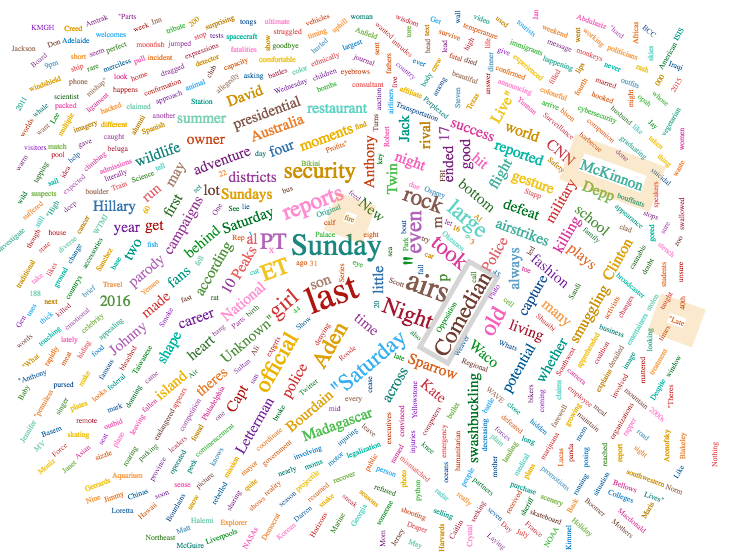

In [5]:
from IPython.display import Image
Image(filename='word cloud.png')

# 2) HTML Parser

The utf8 'magic comment' is to tell Python that this source code will contain unicode literals outside of the ISO-Latin-1 character set.

In [6]:
# -*-coding: utf-8 -*-

Modules for fetching and parsing HTML content:
1. BeautifulSoup : for parsing HTML and XML pages
2. urllib2 : for fetching the content of a URL (e.g. HTML page)
3. json : for JSON reading and writing

In [7]:
from bs4 import BeautifulSoup
import json, urllib2

# this is the html document used in this code
html_doc = """
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
      "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
  <meta http-equiv="content-type" content="text/html; charset=iso-8859-1">
  <title>Three Little Pigs</title>
  <meta name="generator" content="Amaya, see http://www.w3.org/Amaya/">
</head>

<body>
<p>Once upon a time, there were <a
href="http://en.wikipedia.org/wiki/Three_Little_Pigs">three little pigs</a>:</p>
<ol>
  <li><h2>Pig A</h2>
  </li>
  <li><h2>Pig B</h2>
  </li>
  <li><h2>Pig C</h2>
  </li>
</ol>

<p>And unfortunately, there was a <a
href="http://en.wikipedia.org/wiki/Big_bad_wolf">big bad wolf</a> too.</p>

<p>There are many stories about them.</p>

<h2>Story 1</h2>

<p>This is story 1.</p>

<h2>Story 2</h2>

<p>This is story 2.</p>

<h2>Story 3</h2>

<p>This is story 3.</p>

<h1>Type of Houses Constructed</h1>

<table border="1" style="width: 100%">
  <caption></caption>
  <col>
  <col>
  <tbody>
    <tr>
      <td>Pig</td>
      <td>House Type</td>
    </tr>
    <tr>
      <td>Pig A</td>
      <td>Straw</td>
    </tr>
    <tr>
      <td>Pig B</td>
      <td>Stick</td>
    </tr>
    <tr>
      <td>Pig C</td>
      <td>Brick</td>
    </tr>
  </tbody>
</table>
</body>
</html>
"""

In [8]:
# this is the json string used in this lab
json_str = '{"Belle": 3, "Aurora": 2, "Jasmine": 1, "Irene": 1, "Adella": 1}'

The get_title function should should process the HTML page stored in the global variable html_doc, and return the title of the page in a unicode string. `get_title()` should return u'Three Little Pigs'

In [9]:
def get_title():
    soup = BeautifulSoup(html_doc)
    return soup.title.string

The process_json function should load the dictionary stored as a JSON string in global variable json_str, and return the sum of the values in this dictionary. `process_json()` should return 8 because 3+2+1+1+1 = 8

In [10]:
def process_json():
    string = json.loads(json_str)
    return sum(string.itervalues())

The get_pigs function should process the HTML page stored in the global variable html_doc, and return the three pigs listed below 'there were three little pigs' in a JSON string. Note that it should return a string, not a list. `get_pigs()` should return '["Pig A", "Pig B", "Pig C"]'

In [11]:
def get_pigs():
    soup = BeautifulSoup(html_doc)
    piglist = []
    for pigs in soup.find_all('h2'):
        pig = pigs.string
        piglist.append(pig)

    piglist.remove(piglist[5])
    piglist.remove(piglist[4])
    piglist.remove(piglist[3])
    pigdata = json.dumps(piglist)
    return pigdata

The get_story_headings function should process the HTML page stored in the global variable html_doc, and return the three story headings in a JSON string. Note that it should return a string, not a list. `get_story_headings()` should return '["Story 1", "Story 2", "Story 3"]'

In [12]:
def get_story_headings():
    soup = BeautifulSoup(html_doc)
    storylist = []
    for stories in soup.find_all('h2'):
        story = stories.string
        storylist.append(story)

    storylist.remove(storylist[2])
    storylist.remove(storylist[1])
    storylist.remove(storylist[0])
    storydata = json.dumps(storylist)
    return storydata

The get_houses function should process the HTML page stored in the global variable html_doc, and return information in the house table in a JSON string. Note that it should return a string, not a list. `get_houses()` should return '[["Pig A", "Straw"], ["Pig B", "Stick"], ["Pig C", "Brick"]]'

In [13]:
def get_houses():
    soup = BeautifulSoup(html_doc)
    pighouselist = []

    for houses in soup.find_all('td'):
        house = houses.string
        pighouselist.append(house)

    pighouselist1 = pighouselist[2], pighouselist[3]
    pighouselist2 = pighouselist[4], pighouselist[5]
    pighouselist3 = pighouselist[6], pighouselist[7]
    pighouselistfinal = pighouselist1, pighouselist2, pighouselist3
    data = json.dumps(pighouselistfinal)
    return data

The get_links function should process the HTML page stored in the global variable html_doc, and return all url links in the page in a JSON string. Note that it should return a string, not a list. `get_links()` should return '["http://en.wikipedia.org/wiki/Three_Little_Pigs", "http://en.wikipedia.org/wiki/Big_bad_wolf"]'

In [14]:
def get_links():
    soup = BeautifulSoup(html_doc)
    list = []
    for links in soup.find_all('a', href=True):
        link = links.get('href')
        list.append(link)
    data = json.dumps(list)
    return data

The treasure_hunting function should first visit http://www.example.com, and then find the only url link on that page, and then visit that url link. On this page, there is a table under 'Test IDN top-level domains'. In the first column (Domain), there are a list of foreign characters. You need to fetch the content of the cell in column 1 and row 3, and return it in a unicode string.

`treasure_hunting()` should return the Unicode string u'\u6d4b\u8bd5' corresponding to the characters 测试  (the code points U+6D4B U+8BD5)

In [15]:
def treasure_hunting():
    # Your code here: make sure to modify the return statement to pass back
    # the correct value.
    response = urllib2.urlopen('http://www.example.com').read()
    soup = BeautifulSoup(response)
    for treasurelinks in soup.find_all('a', href=True):
        href = treasurelinks.get('href')
        response2 = urllib2.urlopen(href).read().decode('utf-8')
        utfresponse2 = response2.encode('utf-8')
        treasuresoup = BeautifulSoup(utfresponse2)
        for table in treasuresoup.find_all('table', {'class': 'iana-table'}):
            tablelist = []
            for row in table.find_all('tr'):
                columns = row.find_all('td')
                for column in columns:
                    column_string = column.string
                    tablelist.append(column_string)
            return tablelist[8]

In [16]:
# Provided simple test() function used in main() to print
# what each function returns vs. what it's supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print '%s got: %s expected: %s' % (prefix, repr(got), repr(expected))

def test2(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print '%s got: %s expected: %s' % (prefix, got, expected)

# Provided main() calls the above functions with interesting inputs,
# using test() to check if each result is correct or not.
def main():
    print 'get_title'
    
    test(get_title(), u'Three Little Pigs')
    
    print 'process_json'
    
    test(process_json(), 8)
    
    print 'get_pigs'
    
    test(get_pigs(),  '["Pig A", "Pig B", "Pig C"]' )
    
    print 'get_story_headings'
    
    test(get_story_headings(),  '["Story 1", "Story 2", "Story 3"]' )
    
    print 'get_houses'
    
    test(get_houses(), '[["Pig A", "Straw"], ["Pig B", "Stick"], ["Pig C", "Brick"]]')
    
    print 'get_links'
    
    test(get_links(), '["http://en.wikipedia.org/wiki/Three_Little_Pigs", "http://en.wikipedia.org/wiki/Big_bad_wolf"]')
    
    print 'treasure_hunting'
    
    test2(treasure_hunting(), u'\u6d4b\u8bd5')

# Standard boilerplate to call the main() function.
if __name__ == '__main__':
    main()

get_title
 OK  got: u'Three Little Pigs' expected: u'Three Little Pigs'
process_json
 OK  got: 8 expected: 8
get_pigs
 OK  got: '["Pig A", "Pig B", "Pig C"]' expected: '["Pig A", "Pig B", "Pig C"]'
get_story_headings
 OK  got: '["Story 1", "Story 2", "Story 3"]' expected: '["Story 1", "Story 2", "Story 3"]'
get_houses
 OK  got: '[["Pig A", "Straw"], ["Pig B", "Stick"], ["Pig C", "Brick"]]' expected: '[["Pig A", "Straw"], ["Pig B", "Stick"], ["Pig C", "Brick"]]'
get_links
 OK  got: '["http://en.wikipedia.org/wiki/Three_Little_Pigs", "http://en.wikipedia.org/wiki/Big_bad_wolf"]' expected: '["http://en.wikipedia.org/wiki/Three_Little_Pigs", "http://en.wikipedia.org/wiki/Big_bad_wolf"]'
treasure_hunting
 OK  got: 测试 expected: 测试
